In [53]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from skimage.metrics import normalized_root_mse
from skimage.transform import radon, iradon
import mat73

In [54]:
data1 = mat73.loadmat('data/assignmentMathImagingRecon_chestCT.mat')
data1 

{'imageAC': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(512, 512))}

In [45]:
data2 = mat73.loadmat('data/assignmentMathImagingRecon_myPhantom.mat')
data2

{'ans': array(1.),
 'imageMyPhantomAC': array([[5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
         5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
        [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
         5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
        [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
         5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
        ...,
        [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
         5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
        [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
         5.17689712e-17, 5.17689712e-17, 5.17689712e-17],
        [5.17689712e-17, 5.17689712e-17, 5.17689712e-17, ...,
         5.17689712e-17, 5.17689712e-17, 5.17689712e-17]], shape=(256, 256))}

In [46]:
chestCT= data1['imageAC']
myPhantom = data2['imageMyPhantomAC']

In [47]:
datasets = {'imageAC': chestCT, 'imageMyPhantomAC': myPhantom}

In [48]:
theta_range = np.arange(0, 181)  # Angles from 0 to 180
best_theta = {}

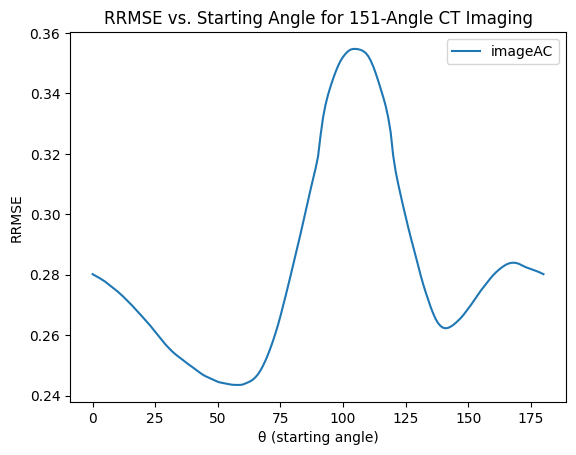

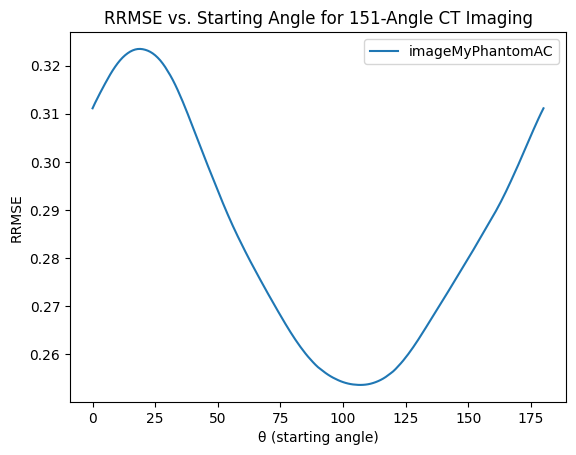

In [51]:
for dataset_name in datasets:
    image = datasets[dataset_name]  # Extract NumPy array correctly
    rrmse_values = []

    for theta in theta_range:
        angles = np.arange(theta, theta + 151) % 180  # Wrap around at 180
        sinogram = radon(image, theta=angles, circle=True)
        reconstructed = iradon(sinogram, theta=angles, filter_name='ramp', circle=True)

        rrmse = normalized_root_mse(image, reconstructed)
        rrmse_values.append(rrmse)

    # Plot RRMSE vs. θ
    plt.plot(theta_range, rrmse_values, label=dataset_name)
    plt.xlabel('θ (starting angle)')
    plt.ylabel('RRMSE')
    plt.title('RRMSE vs. Starting Angle for 151-Angle CT Imaging')
    plt.legend()
    plt.show()
    
    # Find best θ (minimum RRMSE)
    min_rrmse_theta = theta_range[np.argmin(rrmse_values)]
    best_theta[dataset_name] = min_rrmse_theta

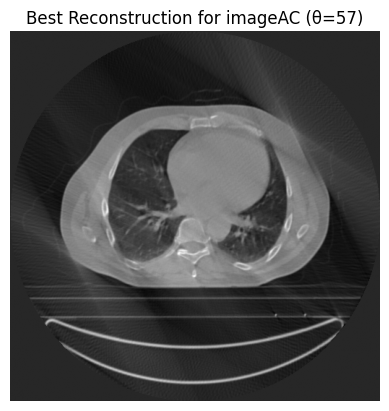

Best θ for imageAC: 57, Best 151 angles: [np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), np.int64(88), np.int64(89), np.int64(90), np.int64(91), np.int64(92), np.int64(93), np.int64(94), np.int64(95), np.int64(96), np.int64(97), np.int64(98), np.int64(99), np.int64(100), np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(105), np.int64(106), np.int64(107), np.int64(108), np.int64(109), np.int64(110), np.int64(111), np.int64(112), np.int64(113), np.int64(114), np.int64(115), np.int64(116), np.int64(117), np.int64(118), np.int64(119), np.int64(120), np.int64(121), np.int64(122), np.int64(12

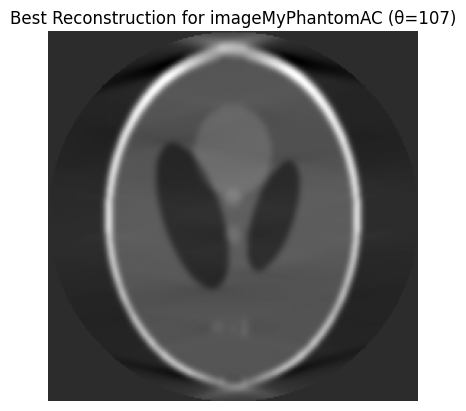

Best θ for imageMyPhantomAC: 107, Best 151 angles: [np.int64(107), np.int64(108), np.int64(109), np.int64(110), np.int64(111), np.int64(112), np.int64(113), np.int64(114), np.int64(115), np.int64(116), np.int64(117), np.int64(118), np.int64(119), np.int64(120), np.int64(121), np.int64(122), np.int64(123), np.int64(124), np.int64(125), np.int64(126), np.int64(127), np.int64(128), np.int64(129), np.int64(130), np.int64(131), np.int64(132), np.int64(133), np.int64(134), np.int64(135), np.int64(136), np.int64(137), np.int64(138), np.int64(139), np.int64(140), np.int64(141), np.int64(142), np.int64(143), np.int64(144), np.int64(145), np.int64(146), np.int64(147), np.int64(148), np.int64(149), np.int64(150), np.int64(151), np.int64(152), np.int64(153), np.int64(154), np.int64(155), np.int64(156), np.int64(157), np.int64(158), np.int64(159), np.int64(160), np.int64(161), np.int64(162), np.int64(163), np.int64(164), np.int64(165), np.int64(166), np.int64(167), np.int64(168), np.int64(169), np.

In [52]:
# Show the best reconstructed images
for dataset_name, image in datasets.items():
    best_theta_val = best_theta[dataset_name]
    best_angles = np.arange(best_theta_val, best_theta_val + 151) % 180
    
    sinogram = radon(image, theta=best_angles, circle=True)
    best_reconstruction = iradon(sinogram, theta=best_angles, filter_name='ramp', circle=True)

    plt.figure()
    plt.imshow(best_reconstruction, cmap='gray')
    plt.title(f'Best Reconstruction for {dataset_name} (θ={best_theta_val})')
    plt.axis('off')
    plt.show()

    print(f"Best θ for {dataset_name}: {best_theta_val}, Best 151 angles: {list(best_angles)}")